## Bike Buyers Dataset Analystics


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../Dataset/bike_buyers_clean.csv")

In [4]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [5]:
df.isna().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [6]:
df.dtypes

ID                   int64
Marital Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Purchased Bike      object
dtype: object

### Who buy more bikes married or single with category male or female

In [7]:
marital_status_group = df.groupby(["Marital Status", "Purchased Bike"]).size().unstack()

In [8]:
marital_status_group

Purchased Bike,No,Yes
Marital Status,,
Married,307,232
Single,212,249


<Axes: xlabel='Marital Status'>

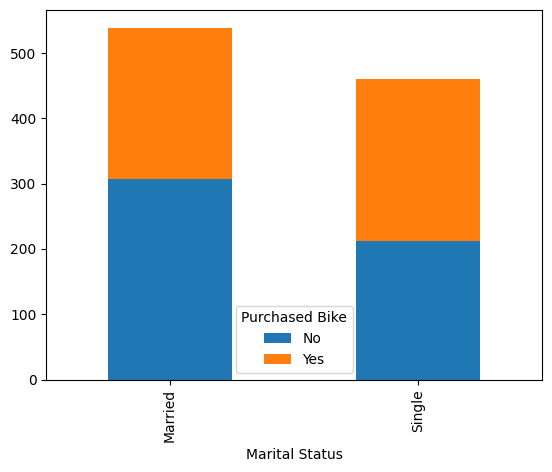

In [9]:
marital_status_group.plot(kind="bar", stacked=True,)

(array([151., 287.,  40., 289.,  91.,  67.,  33.,  32.,   4.,   6.]),
 array([ 10000.,  26000.,  42000.,  58000.,  74000.,  90000., 106000.,
        122000., 138000., 154000., 170000.]),
 <BarContainer object of 10 artists>)

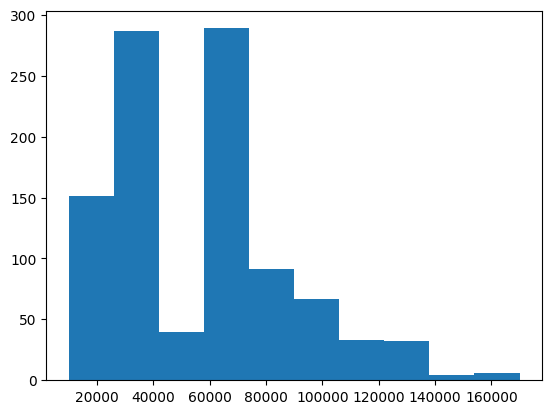

In [10]:
plt.hist(df["Income"])



1. What is the distribution of marital status in the dataset?
2. How does gender distribution vary in different regions?
3. What is the distribution of income levels among different education categories?
4. Can you create a histogram showing the distribution of ages in the dataset?
5. What is the relationship between the number of children and home ownership?
6. What is the distribution of occupations in the dataset?
7. How many individuals own cars, and how does this vary by gender?
8. What is the most common commute distance for individuals in the dataset?
9. How does the education level impact the likelihood of purchasing a bike?
10. Are there any correlations between income and the number of cars owned?
11. What is the age distribution of individuals who have purchased a bike?
12. What is the distribution of income levels for bike owners?
13. How do different regions compare in terms of bike purchases?
14. What is the average age of individuals by gender?
15. Can you create a scatter plot showing the relationship between income and age?
16. How does the number of children affect the likelihood of being a home owner?
17. Are there any trends in bike purchases over time (e.g., by age)?
18. What is the distribution of income levels for different marital statuses?
19. How does occupation vary with respect to gender?
20. What is the distribution of commute distances iers to these questions.

## What is the distribution of marital status in the dataset?

In [20]:
marital_group = df.groupby("Marital Status").size()
marital_group

Marital Status
Married    539
Single     461
dtype: int64

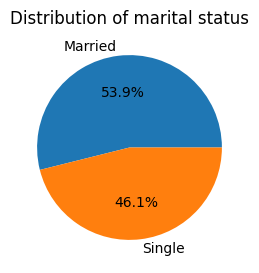

In [35]:
fig, axes = plt.subplots(figsize=(3,3))

axes.pie(marital_group, labels=marital_group.index, autopct='%1.1f%%')
axes.set_title("Distribution of marital status")
plt.show()

## How does gender distribution vary in different regions?

In [44]:
gender_group = df.groupby(["Region", "Gender"]).size().unstack()
gender_group

Gender,Female,Male
Region,,
Europe,164,136
North America,240,268
Pacific,87,105


In [40]:
gender_group.get_group(("Europe", "Male"))

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
7,19364,Married,Male,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,43,Yes
9,19280,Married,Male,20000,2,Partial College,Manual,Yes,1,0-1 Miles,Europe,48,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,15450,Married,Male,10000,1,Graduate Degree,Clerical,Yes,0,0-1 Miles,Europe,70,No
485,19491,Single,Male,30000,2,Partial College,Clerical,Yes,2,0-1 Miles,Europe,42,No
487,12821,Married,Male,40000,0,Bachelors,Clerical,Yes,0,0-1 Miles,Europe,39,No
489,27835,Married,Male,20000,0,Partial High School,Manual,Yes,2,0-1 Miles,Europe,32,No


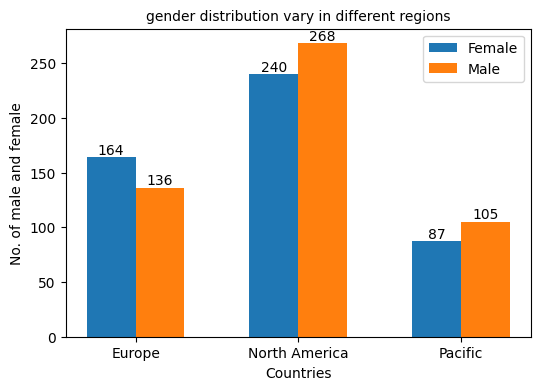

In [60]:
fig, axes = plt.subplots(figsize=(6,4))

labels = np.arange(len(gender_group.index))

width = 0.3
offset = 0

for label, values in gender_group.items():
    bar = axes.bar(labels+offset, values, label=label, width=width)
    offset += width
    axes.bar_label(bar)
    
midpoint = labels+(len(gender_group.columns)*width)/2
axes.set_xticks(midpoint-(width/2), gender_group.index)
axes.set_title("gender distribution vary in different regions", fontsize=10)
axes.set_xlabel("Countries")
axes.set_ylabel("No. of male and female")
plt.legend()

plt.show()

## What is the distribution of income levels among different education categories?

In [61]:
education_group = df.groupby(["Education", "Income"]).size().unstack()
education_group

Income,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,150000,160000,170000
Education,,,,,,,,,,,,,,,,
Bachelors,4.0,11.0,30.0,49.0,20.0,56.0,49.0,36.0,15.0,11.0,10.0,7.0,7.0,1.0,NaN,NaN
Graduate Degree,8.0,3.0,8.0,12.0,19.0,42.0,31.0,27.0,4.0,6.0,NaN,1.0,11.0,NaN,1.0,1.0
High School,18.0,25.0,36.0,43.0,NaN,19.0,8.0,6.0,8.0,3.0,1.0,4.0,5.0,2.0,1.0,NaN
Partial College,21.0,15.0,53.0,45.0,1.0,46.0,29.0,18.0,9.0,8.0,5.0,2.0,9.0,1.0,1.0,2.0
Partial High School,23.0,23.0,7.0,4.0,NaN,3.0,6.0,4.0,2.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN


## Can you create a histogram showing the distribution of ages in the dataset?

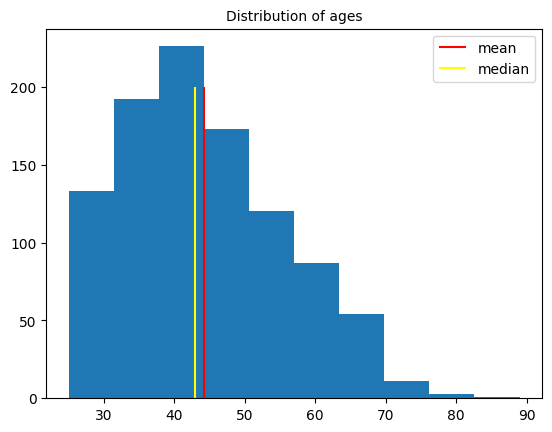

In [73]:
plt.hist(df["Age"])
plt.vlines(df["Age"].mean(), 0 , 200, color="red", label="mean")
plt.vlines(df["Age"].median(), 0 , 200, color="yellow", label="median")
plt.title("Distribution of ages", fontsize=10)
plt.legend()

## What is the relationship between the number of children and home ownership

In [87]:
home_group = df.groupby(["Children", "Home Owner"]).size().unstack()
home_group

Home Owner,No,Yes
Children,,
0,133,144
1,33,137
2,63,147
3,41,94
4,25,102
5,20,61


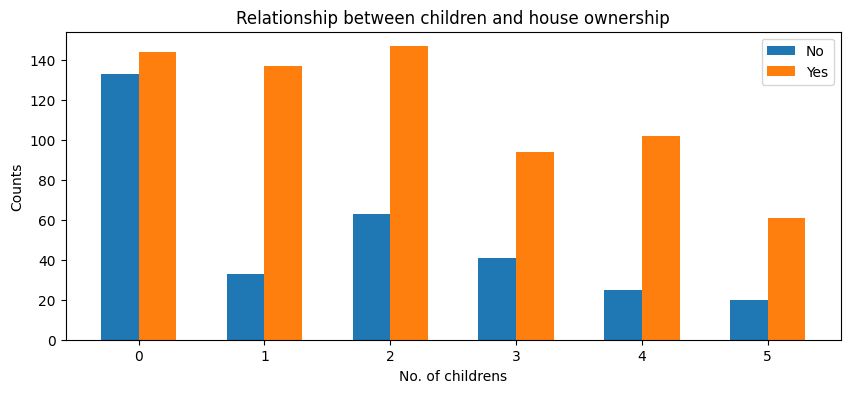

In [90]:
fig , axes = plt.subplots(figsize=(10,4))

labels = np.arange(len(home_group.index))

offset = 0 
width = 0.3

for owner, children in home_group.items():
    axes.bar(labels+offset, children, label=owner, width=width)
    offset += width

midpoint = labels+(len(home_group.columns)*width)/2
axes.set_xticks(midpoint-(width/2), home_group.index)
axes.set_title("Relationship between children and house ownership")
axes.set_xlabel("No. of childrens")
axes.set_ylabel('Counts')
plt.legend()
plt.show()

## What is the distribution of occupations in the dataset

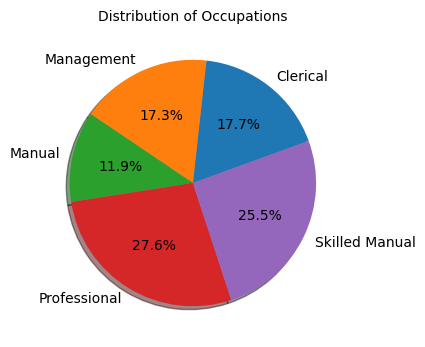

In [106]:
occupation_group = df.groupby("Occupation").size()

fig, axes = plt.subplots(figsize=(4,4))

axes.pie(occupation_group, labels = occupation_group.index, autopct="%1.1f%%", shadow=True,startangle=20)
axes.set_title("Distribution of Occupations", fontsize=10)
plt.show()

## How many individuals own cars, and how does this vary by gender

In [108]:
car_group = df.groupby(["Cars", "Gender"]).size().unstack()
car_group

Gender,Female,Male
Cars,,
0,130,113
1,135,132
2,165,180
3,33,52
4,28,32


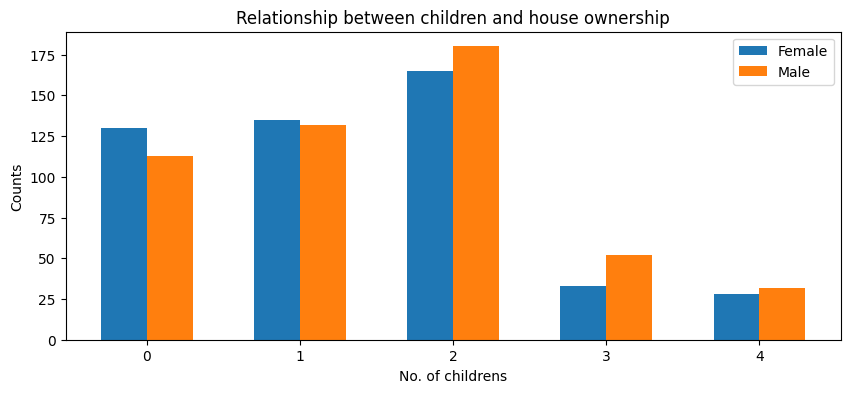

In [111]:
fig , axes = plt.subplots(figsize=(10,4))

labels = np.arange(len(car_group.index))

offset = 0 
width = 0.3

for gender, car in car_group.items():
    axes.bar(labels+offset, car, label=gender, width=width)
    offset += width

midpoint = labels+(len(car_group.columns)*width)/2
axes.set_xticks(midpoint-(width/2), car_group.index)
axes.set_title("Relationship between children and house ownership")
axes.set_xlabel("No. of childrens")
axes.set_ylabel('Counts')
plt.legend()
plt.show()